In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import itertools
from sklearn import svm,tree

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score,precision_recall_curve,roc_curve,recall_score, f1_score, roc_auc_score, accuracy_score,confusion_matrix,classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<AxesSubplot:xlabel='Class', ylabel='count'>

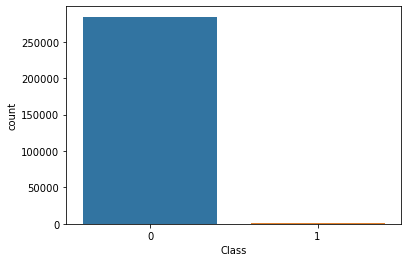

In [16]:
sns.countplot(x =df['Class'])

/Users/mannybharathi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

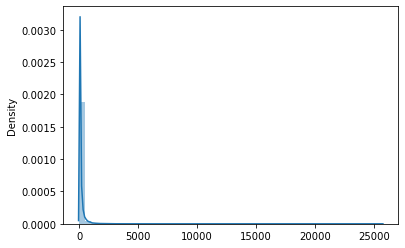

In [19]:


sns.distplot(x = df['Amount'])




/Users/mannybharathi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

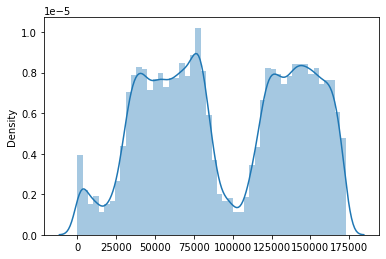

In [20]:


sns.distplot(x = df['Time'])

In [21]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [22]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [24]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
112730,-0.420064,0.783890,1.807046,1.698327,0.390525,1.260446,0.156633,0.440328,-0.657691,0.244890,...,0.369748,-0.369264,-1.011990,0.198586,0.175289,0.063390,0.045192,0,0.071823,-0.139957
152295,-17.537592,12.352519,-20.134613,11.122771,-14.571080,-0.381622,-23.928661,-4.724921,-8.603038,-15.231833,...,2.389041,2.019128,0.627192,-1.085997,-0.071803,-3.838198,-0.802564,1,-0.170195,0.147358
27563,1.195570,-0.720000,0.742596,-0.511690,-1.311439,-0.627037,-0.610728,-0.056742,-0.758437,0.575843,...,-1.170363,0.276802,0.395628,-0.250950,0.748462,-0.036410,0.028977,0,0.614826,-0.588506
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1,4.781527,-0.507372
197586,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,-2.248115,...,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,1,6.409837,0.556797


In [26]:
new_df.shape

(984, 31)

In [69]:
new_df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
V1,1.000000,-0.771252,0.855146,-0.558925,0.830389,0.421848,0.859749,-0.368214,0.551317,0.666104,...,0.249197,0.061791,-0.017986,-0.190472,-0.013055,-0.278352,0.056568,-0.424963,-0.068962,0.273433
V2,-0.771252,1.000000,-0.838591,0.634296,-0.740322,-0.386924,-0.798907,0.242033,-0.598628,-0.699068,...,-0.334321,0.064547,-0.048298,0.240757,0.054877,0.296757,0.142616,0.477712,-0.217890,-0.236938
V3,0.855146,-0.838591,1.000000,-0.739060,0.813781,0.564868,0.874986,-0.432252,0.691917,0.813346,...,0.186896,0.050064,0.063021,-0.185875,-0.065342,-0.365584,0.025691,-0.568509,-0.049471,0.165304
V4,-0.558925,0.634296,-0.739060,1.000000,-0.503924,-0.462926,-0.688749,0.260669,-0.758035,-0.773368,...,-0.049223,-0.030892,-0.112923,0.014612,0.186445,0.294420,-0.032209,0.705307,0.040323,-0.215806
V5,0.830389,-0.740322,0.813781,-0.503924,1.000000,0.363316,0.812048,-0.490746,0.553829,0.679865,...,0.161125,-0.004297,-0.107760,-0.205415,0.009088,-0.243341,0.049095,-0.346184,-0.171281,0.340000
V6,0.421848,-0.386924,0.564868,-0.462926,0.363316,1.000000,0.427814,-0.581261,0.478910,0.536759,...,-0.087103,0.304803,-0.097668,-0.143688,-0.023520,-0.188817,-0.025612,-0.394610,0.159324,0.111828
V7,0.859749,-0.798907,0.874986,-0.688749,0.812048,0.427814,1.000000,-0.241583,0.662937,0.812543,...,0.275581,0.050985,0.018792,-0.076788,-0.054216,-0.364077,0.016017,-0.501512,0.077147,0.292195
V8,-0.368214,0.242033,-0.432252,0.260669,-0.490746,-0.581261,-0.241583,1.000000,-0.358802,-0.324855,...,0.345487,-0.352973,0.107418,0.170219,-0.003626,0.066196,-0.106651,0.109598,0.013738,-0.142112
V9,0.551317,-0.598628,0.691917,-0.758035,0.553829,0.478910,0.662937,-0.358802,1.000000,0.785231,...,-0.012914,0.061237,0.053650,-0.104269,-0.188875,-0.315968,0.082663,-0.542224,-0.001127,0.157108
V10,0.666104,-0.699068,0.813346,-0.773368,0.679865,0.536759,0.812543,-0.324855,0.785231,1.000000,...,0.048268,0.055800,0.060991,-0.071994,-0.102616,-0.371994,0.037973,-0.666611,-0.057877,0.251110


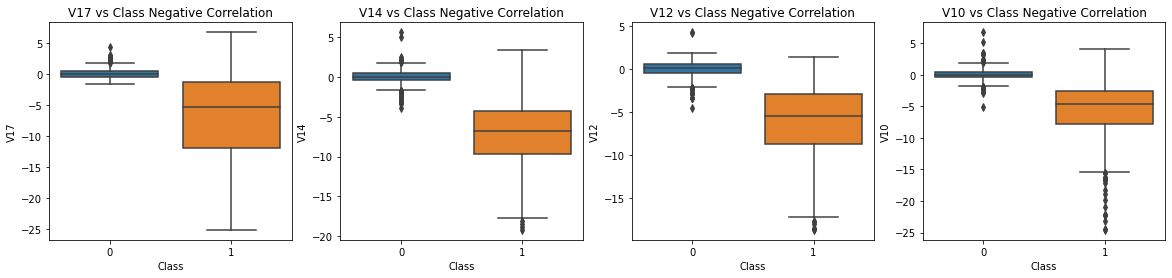

In [28]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

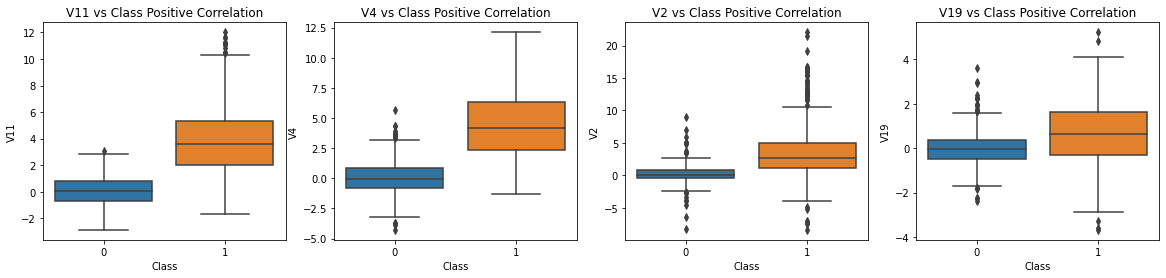

In [29]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [30]:
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.8220867423816, -19.2143254902614, -18.4937733551053, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.0475965708216, -18.6837146333443, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 974
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.2318333653018, -18.913243

In [31]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [32]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using Not Fraud and Fraud for 0 and 1    
class_names = ['Not Fraud','Fraud']

kNN Accuracy is 0.88
Cross Validation Score = 0.94
              precision    recall  f1-score   support

           0       0.79      0.99      0.88        83
           1       0.99      0.79      0.88       106

    accuracy                           0.88       189
   macro avg       0.89      0.89      0.88       189
weighted avg       0.90      0.88      0.88       189



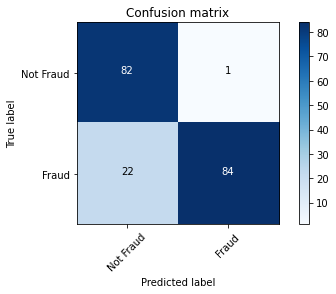

In [52]:
knn = KNeighborsClassifier(n_neighbors = 6)
#Fitting the classifier to the training set
knn.fit(X_train,y_train)
print ("kNN Accuracy is %2.2f" % accuracy_score(y_test, knn.predict(X_test)))
#The cross validation score is obtained for kNN using 10 folds
score_knn = cross_val_score(knn, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_knn)
y_pred= knn.predict(X_test)
print(classification_report(y_test, y_pred))
#Defining the confusion matrix
cm = confusion_matrix(y_test,y_pred)
#Plotting the confusion matrix
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Logistic Accuracy is 0.89
Cross Validation Score = 0.94
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        83
           1       0.96      0.84      0.89       106

    accuracy                           0.89       189
   macro avg       0.89      0.90      0.89       189
weighted avg       0.90      0.89      0.89       189



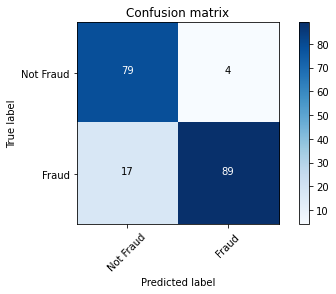

In [53]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))
score_LR = cross_val_score(LR, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_LR)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion matrix for LR
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

SVM Accuracy is 0.88
Cross Validation Score = 0.94
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        83
           1       0.98      0.81      0.89       106

    accuracy                           0.88       189
   macro avg       0.89      0.89      0.88       189
weighted avg       0.90      0.88      0.88       189



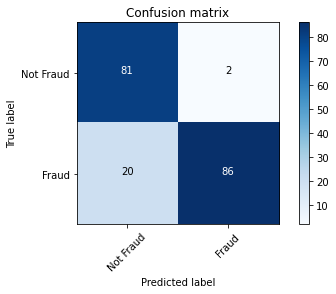

In [56]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)
print ("SVM Accuracy is %2.2f" % accuracy_score(y_test, SVM.predict(X_test)))
score_svm = cross_val_score(SVM, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_svm)
y_pred = SVM.predict(X_test)
print(classification_report(y_test,y_pred))
#Confusion matrix for SVM
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Decision Tree Accuracy is 0.89
Cross Validation Score = 0.91
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        83
           1       0.92      0.88      0.90       106

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189



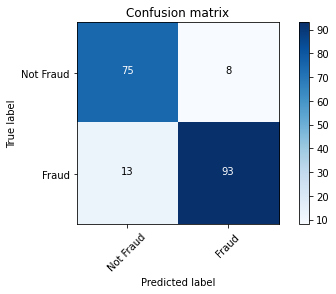

In [72]:
DT = tree.DecisionTreeClassifier(random_state = 0,class_weight="balanced",
    min_weight_fraction_leaf=0.03)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))
score_DT = cross_val_score(DT, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_DT)
y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Random Forest Accuracy is 0.90
Cross Validation Score = 0.94
              precision    recall  f1-score   support

           0       0.83      0.99      0.90        83
           1       0.99      0.84      0.91       106

    accuracy                           0.90       189
   macro avg       0.91      0.91      0.90       189
weighted avg       0.92      0.90      0.91       189



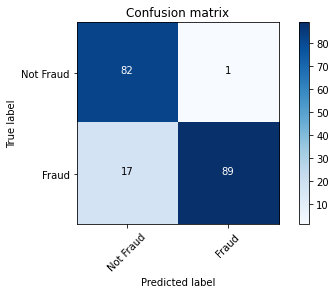

In [58]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))
score_rfc = cross_val_score(rfc, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_rfc)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))
#Confusion Matrix for Random Forest
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

AdaBoost Accuracy= 0.91
Cross Validation Score = 0.94
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        83
           1       0.98      0.86      0.91       106

    accuracy                           0.91       189
   macro avg       0.91      0.92      0.91       189
weighted avg       0.92      0.91      0.91       189



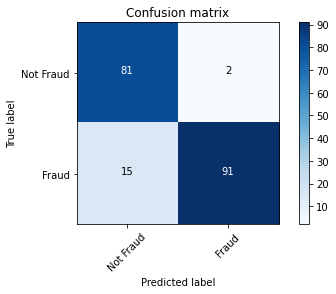

In [73]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.3)
ada.fit(X_train,y_train)
print ("AdaBoost Accuracy= %2.2f" % accuracy_score(y_test,ada.predict(X_test)))
score_ada = cross_val_score(ada, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_ada)
y_pred = ada.predict(X_test)
print(classification_report(y_test,y_pred ))
#Confusion Marix for AdaBoost
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

GradientBoost Accuracy= 0.90
Cross Validation Score = 0.94
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        83
           1       0.98      0.84      0.90       106

    accuracy                           0.90       189
   macro avg       0.90      0.91      0.90       189
weighted avg       0.91      0.90      0.90       189



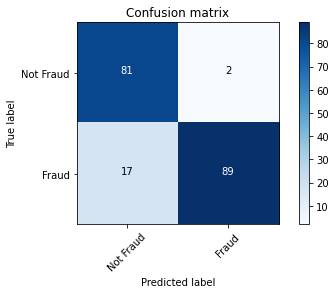

In [62]:
xgb = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
xgb.fit(X_train,y_train)
print ("GradientBoost Accuracy= %2.2f" % accuracy_score(y_test,xgb.predict(X_test)))
score_xgb = cross_val_score(xgb, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_ada)
y_pred = xgb.predict(X_test) 
print(classification_report(y_test,y_pred))
#Confusion Matrix for XGBoost Classifier
cm_xg = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm_xg, classes=class_names, title='Confusion matrix')

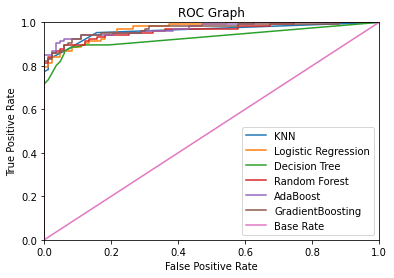

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
#SVM_fpr, SVM_tpr, thresholds = roc_curve(y_test, SVM.predict_proba(X_test)[:,1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
#PLotting ROC Curves for all classifiers
plt.plot(fpr, tpr, label='KNN' )
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression')
#plt.plot(SVM_fpr, SVM_tpr, label='SVM')
plt.plot(DT_fpr, DT_tpr, label='Decision Tree')
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest')
plt.plot(ada_fpr, ada_tpr, label='AdaBoost')
plt.plot(xgb_fpr, xgb_tpr, label='GradientBoosting')
# Plot Base Rate ROC
plt.plot([0,1],[0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

[0.015  0.025  0.0325 0.075  0.0275 0.005  0.0025 0.04   0.035  0.0325
 0.0275 0.0475 0.03   0.1125 0.0175 0.0025 0.0275 0.0225 0.17   0.0075
 0.0275 0.     0.0225 0.0325 0.0275 0.025  0.0075 0.0125 0.0775 0.0125]


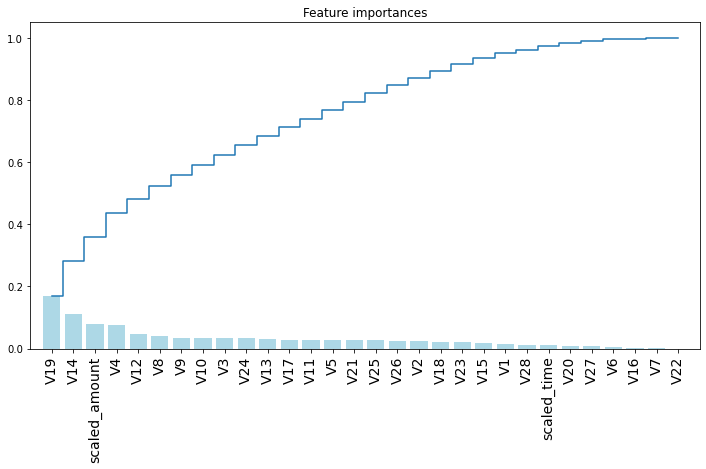

In [68]:
model = ada
model.fit(X_train, y_train)
# Printing important features in the model
print(model.feature_importances_)
importances = model.feature_importances_
feat_names = new_df.drop(['Class'],axis=1).columns

# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()